In [373]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


In [374]:
df = pd.read_csv("heart_attack\heart.csv")
saturate =  pd.read_csv("heart_attack\o2Saturation.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [375]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [376]:
df['max_attack'] = 220

In [377]:
df['rate_of_attack'] = (df['thalachh'] +df['age'])/df['max_attack']
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,max_attack,rate_of_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,220,0.968182
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,220,1.018182
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,220,0.968182
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,220,1.063636
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,220,1.000000


In [378]:
df['atm'] = df['trtbps']/760


In [379]:
df['chol_in_gram'] = df['chol']/100

In [380]:
df1 = df.drop(['age', 'thalachh','chol', 'trtbps', 'max_attack'], axis=1)

In [381]:
df1.head()

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,rate_of_attack,atm,chol_in_gram
0,1,3,1,0,0,2.3,0,0,1,1,0.968182,0.190789,2.33
1,1,2,0,1,0,3.5,0,0,2,1,1.018182,0.171053,2.50
2,0,1,0,0,0,1.4,2,0,2,1,0.968182,0.171053,2.04
3,1,1,0,1,0,0.8,2,0,2,1,1.063636,0.157895,2.36
4,0,0,0,1,1,0.6,2,0,2,1,1.000000,0.157895,3.54


<AxesSubplot:>

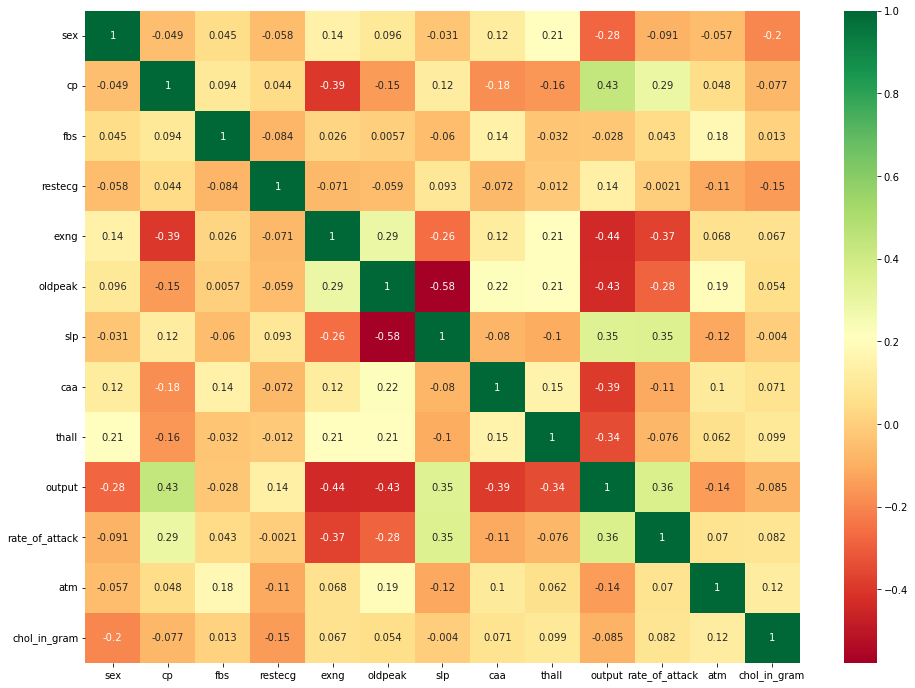

In [382]:
corrmat = df1.corr()
top_corr_fea = corrmat.index
plt.figure(figsize=(16,12))
sns.heatmap(df1[top_corr_fea].corr(), annot=True, cmap='RdYlGn')

In [383]:
y = df1['output']
x = df1.drop(['output'], axis=1)

In [384]:
extra_tree = ExtraTreeRegressor()
extra_tree.fit(x,y)

ExtraTreeRegressor()

In [385]:
extra_tree.feature_importances_

array([0.03606296, 0.13081832, 0.02153368, 0.0415839 , 0.06842701,
       0.07353319, 0.04371685, 0.12437672, 0.24858839, 0.09785062,
       0.055288  , 0.05822035])

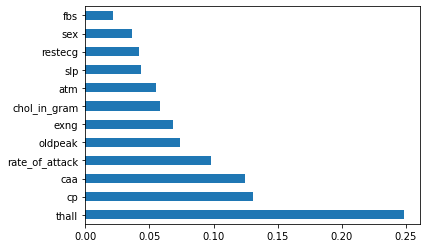

In [386]:
feat_importan = pd.Series(extra_tree.feature_importances_, index= x.columns)
feat_importan.nlargest(12).plot(kind = 'barh')
plt.show()

In [387]:
X = x.drop(['fbs'], axis=1)

In [388]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [389]:
x_train.shape

(242, 11)

In [390]:
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
scores = (predictions == y_test).sum()/len(y_test)
scores

0.5245901639344263

In [391]:
from sklearn.ensemble import RandomForestClassifier
sk_reg = RandomForestClassifier()
sk_reg.fit(x_train,y_train)

svc = SVC()
svc.fit(x_train,y_train)
predictions1 = svc.predict(x_test)
scores1 = (predictions1 == y_test).sum()/len(y_test)
scores1


0.8360655737704918

In [392]:

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [393]:
pre = clf.predict(x_test)
(pre == y_test).sum()/len(y_test)


0.8852459016393442